## Problem Set 1 
#### Canonical Stromgren Sphere Notebook
#### v1 02/08/24

__Fred Angelo Batan Garcia__

In [581]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import os
import matplotlib as mpl
import pyCloudy as pc

# Define verbosity to high level (will print errors, warnings and messages)
pc.log_.level = 3

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update(
    {
        "text.usetex": True,
        # "font.family": "Helvetica",
        "font.family": "serif",
        "mathtext.fontset": "cm",
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
        "font.size": 8,
        "xtick.direction": "in",
        "ytick.direction": "in",
        "ytick.right": True,
        "xtick.top": True,
        # "axes.linewidth": ,
    }
)

In [37]:
# The directory in which we will have the model
# You may want to change this to a different place so that the current directory
# will not receive all the Cloudy files.

# CHANGE the directory below if you wish
dir_ = "./o7v/"

#### Key Model Parameters

In [38]:
model_name = "hw1_v1"
full_model_name = os.path.join(dir_, model_name)

## For an O7V stars

In [535]:
def run_cloudy(dir_, model_name, dens=3.0, metals=1, Teff=36870.0, config=None):
    # dens = 3. #log cm-3, we'll assume uniform density
    # Teff = 36870.0 # Effective blackbody temperature of Central Star in K
    qH = 48.75  # Rate of production of Hydrogen ionizing photons in log photons s^-1
    abundance_predef = "hii region"  # Use pre-defined hii region abundances
    # metals = 1   # Metal scaling for abundances (for Problem 3)
    r_min = 5e16  # cm Inner radius (use as default)
    # r_max = 2e18 # cm  # Outer radius (if needed)
    dist = 1.0  # kpc, only used for final output spectra

    full_model_name = os.path.join(dir_, model_name)

    options = (
        "no molecules",
        "no level2 lines",
        "no fine opacities",
        "atom h-like levels small",
        "atom he-like levels small",
        "COSMIC RAY BACKGROUND",
        "element limit off -8",
        "print line optical depth",
    )
    # Emission lines that we may be using for analysis of model outputs
    emis_tab = [
        "H  1  4861.33A",
        "H  1  6562.81A",
        "Ca B  5875.64A",
        "N  2  6583.45A",
        "N  2  5756.20A",  # added for problem 3
        "N  2  6585.30A",  # added for problem 3
        "O  1  6300.30A",
        "O  2  3726.03A",
        "O  2  3727.10A",
        "O  2  3729.80A",
        "O  2  3728.81A",
        "S  2  6716.44A",
        "S  2  6718.30A",
        "S  2  6730.82A",
        "S  2  6732.70A",
        "O  3  4364.40A",  # added for problem 3
        "O  3  5006.84A",
        "O  3  5008.20A",  # added for problem 3
        "BLND  4363.00A",
        "Cl 3  5517.71A",
        "Cl 3  5537.87A",
        "O  1  63.1679m",
        "O  1  145.495m",
        "C  2  157.636m",
    ]
    # Defining the object that will manage the input file for Cloudy
    c_input = pc.CloudyInput(full_model_name)

    # Filling the object with the parameters
    # Defining the ionizing SED: Effective temperature and luminosity.
    # The lumi_unit is one of the Cloudy options, like "luminosity solar", "q(H)", "ionization parameter", etc...
    if config is None:
        c_input.set_BB(Teff=Teff, lumi_unit="q(H)", lumi_value=qH)
    elif config == "seyfert":
        c_input.set_star()
        c_input.set_star(
            SED="table AGN",
            SED_params="",
            lumi_unit="ionization parameter",
            lumi_value=-2,
        )

    # Example, if you would like to use the ionization parameter U to set luminosity
    # c_input.set_BB(Teff = Teff, lumi_unit = 'ionization parameter', lumi_value = logU)

    # Defining the density and profile
    c_input.set_cste_density(dens)  # constant density

    # Defining the inner radius. A second parameter could be the outer radius (matter-bounded nebula).
    # c_input.set_radius(r_in=np.log10(r_min),r_out=np.log10(r_max))
    c_input.set_radius(r_in=np.log10(r_min))

    # c_input.set_abund(ab_dict = abund, nograins = True)
    c_input.set_abund(
        predef=abundance_predef, nograins=True, metals=metals
    )  # Use pre-defined hii region abundances

    # Other options from above
    c_input.set_other(options)

    c_input.set_iterate(
        10
    )  # (0) for no iteration, () for one iteration, (N) for N iterations.
    c_input.set_sphere()  # () or (True) : sphere, or (False): open geometry.
    c_input.set_emis_tab(
        emis_tab
    )  # better use read_emis_file(file) for long list of lines, where file is an external file.
    c_input.set_distance(
        dist=dist, unit="kpc", linear=True
    )  # unit can be 'kpc', 'Mpc', 'parsecs', 'cm'. If linear=False, the distance is in log.
    # Writing the Cloudy inputs. to_file for writing to a file (named by full_model_name). verbose to print on the screen.
    c_input.print_input(to_file=True, verbose=False)

    # CHANGE THIS DIRECTORY BELOW
    pc.config.cloudy_exe = "/home/fabg/Cloudy/c23.01/source/cloudy.exe"

    # Printing some message to the screen
    pc.log_.message("Running {0}".format(model_name), calling=model_name)

    # Running Cloudy with a timer. Here we reset it to 0.
    pc.log_.timer("Starting Cloudy", quiet=True, calling=model_name)
    c_input.run_cloudy()
    pc.log_.timer("Cloudy ended after seconds:", calling=model_name)

In [536]:
run_cloudy(dir_="./o7v/", model_name="hw1_v1")

   hw1_v1: Cloudy ended after seconds: in 71.53330540657043


## Cloudy Outputs

In [428]:
# Reading the Cloudy outputs in the Mod CloudyModel object
Mod = pc.CloudyModel(full_model_name)

print("=================================================================")
print(
    "Table of line labels, volume emissivities, and relative volume emissivities (Hbeta = 100)"
)
print("=================================================================")
print("Label         vol. emis.  rel. emis.")
for line in Mod.emis_labels:
    print(
        "{0} {1:10.3e} {2:7.2f}".format(
            line,
            Mod.get_emis_vol(line),
            Mod.get_emis_vol(line) / Mod.get_emis_vol("H__1_486133A") * 100.0,
        )
    )

print("=================================================================")

print("model overview: radii, mass, ion fractions, temperatures, densities and log U")
Mod.print_stats()

     CloudyModel ./o7v/hw1_v1: Creating CloudyModel for ./o7v/hw1_v1
     CloudyModel ./o7v/hw1_v1: Li abundance not defined
     CloudyModel ./o7v/hw1_v1: Be abundance not defined
     CloudyModel ./o7v/hw1_v1: B abundance not defined
     CloudyModel ./o7v/hw1_v1: F abundance not defined
     CloudyModel ./o7v/hw1_v1: Sc abundance not defined
     CloudyModel ./o7v/hw1_v1: Ti abundance not defined
     CloudyModel ./o7v/hw1_v1: V abundance not defined
     CloudyModel ./o7v/hw1_v1: Co abundance not defined
     CloudyModel ./o7v/hw1_v1: Cu abundance not defined
     CloudyModel ./o7v/hw1_v1: ./o7v/hw1_v1.rad read
     CloudyModel ./o7v/hw1_v1: Number of zones: 222
     CloudyModel ./o7v/hw1_v1: ./o7v/hw1_v1.phy read
     CloudyModel ./o7v/hw1_v1: ./o7v/hw1_v1.ele_H read
     CloudyModel ./o7v/hw1_v1: filling H with 3 columns
     CloudyModel ./o7v/hw1_v1: ./o7v/hw1_v1.ele_He read
     CloudyModel ./o7v/hw1_v1: filling He with 3 columns
     CloudyModel ./o7v/hw1_v1: ./o7v/hw1_v1.ele_

# Question 1

Parts a - b answered below.

In [429]:
def stromgren_r(Q0, nH, T):
    """
    nH cm^-3
    Q0 s^-1
    """
    alpha_B = 2.56e-13 * (T / 1e4) ** -0.83
    Rs0 = ((3 * Q0) / (4 * np.pi * nH**2 * alpha_B)) ** (1 / 3)
    # Rs0 = 9.77e18 * (Q0 / 1e49)**(1/3) * (nH / 1e2)**-(2/3) * (T / 1e4)**0.28
    return Rs0


def mean_free_path(nH):
    """
    18eV photon in netural hydrogen
    """
    return 3.39e17 * (1 / nH)


def analytic_rHeIIrHII(T):
    """
    equation 15.36
    """
    nH_over_nHe = 0.096
    Q1_over_Q0 = 0.135

    alpha_B_H = 2.56e-13 * (T / 1e4) ** -0.83
    alpha_B_He = 2.72e-13 * (T / 1e4) ** -0.789  # eq 14.15

    alpha_1s2_He = 1.54e-13 * (T / 1e4) ** -0.486

    # bottom of page 173
    y = 0.2

    # let's also take an intermediate value
    z = 0.8

    numerator = nH_over_nHe * (1 - y) * alpha_B_H * Q1_over_Q0
    denominator = (
        alpha_B_He + y * alpha_1s2_He - (1 - y) * (1 - z) * Q1_over_Q0 * alpha_B_He
    )

    ratio = (numerator / denominator) ** (1 / 3)
    return ratio

In [430]:
r = Mod.radius
HII = Mod.get_ionic("H", 1)
HI = Mod.get_ionic("H", 0)
HeI = Mod.get_ionic("He", 0)
HeII = Mod.get_ionic("He", 1)
HeIII = Mod.get_ionic("He", 2)

In [492]:
radius_strom = stromgren_r(10 ** (48.75), 10**3, Teff)
print("stromgren radius = {:.2E} [cm]".format(radius_strom))

radius_HII = r[-1]
print("model radius = {:.2E} [cm]".format(radius_HII))
print("radius stromgren / model ", radius_strom / radius_HII)

idx_90percent_ion = np.argmin(np.abs(HII - 0.90))
idx_10percent_ion = np.argmin(np.abs(HII - 0.10))

HII_transition_start = r[idx_90percent_ion]
HII_transition_end = r[idx_10percent_ion]
transition_width = HII_transition_end - HII_transition_start
print("transition width H+ to H0 transition = {:.3E} cm".format(transition_width))

mfp = mean_free_path(10**3)
print("18eV photon meanfree path = {:.2E} [cm]".format(mfp))

print(
    "transition width H+ to H0 transition / 18eV photon meanfree path = ",
    transition_width / mfp,
)

expected_rad_ratio = analytic_rHeIIrHII(Teff)
print(
    "expected radius ratio of from analytic formula HeII / HII = ", expected_rad_ratio
)

R_HPlus = r[np.argmin(np.abs(HII - 0.50))]
R_HePlus = r[np.argmin(np.abs(HeII - 0.50))]
print(R_HePlus)
print("model ratio of HeII / HII = ", R_HePlus / R_HPlus)

stromgren radius = 2.49E+18 [cm]
model radius = 1.58E+18 [cm]
radius stromgren / model  1.5771692129551127
transition width H+ to H0 transition = 9.630E+15 cm
18eV photon meanfree path = 3.39E+14 [cm]
transition width H+ to H0 transition / 18eV photon meanfree path =  28.4070796460177
expected radius ratio of from analytic formula HeII / HII =  0.20056129469582046
6.37018e+16
model ratio of HeII / HII =  0.04039659841081609


a. The radius of the singly ionized hydrogen (HII) region from the model was calculated to be 2.49E+18 cm while the model radius = 1.58E+18. Both are around 1 pc. 

b. The width of the transition from H+ to H0 is around  9.630E+15 cm, while the mean free path of an electron with h nu = 18 eV is around 3.39E+14. As you can see, the tranistion is around 28 times bigger than the mean free math. This might be due to the numerical resolution of the radial bins, which smooths this transition. Becasue, usually, mfp << the stromgren radius, meaning the transition from ionized gas to neutral gas at the boundary of the H II region will occur over a distance that is small compared to RS0. This appears as a discontinuity usually. What controlls this is ultimately the radiation bins. 

c. Below, we see farly high HeIII full ionization zone approximately 10^17 cm from the star. We really only see one zone near the star where the Helium is fully ionized. The single ionization region starts to dominate past this radius, while the neutral HeI region ionization fraction doesn't go past zero up until around 1.41715e+18 cm. Note, we define the end of these regions by seeing where the ionization fraction drops to 0.50. From the model, we observe that this ratio is  HeII / HII = 0.04, meaning the HeII region stops sooner than the HII region. This is a little bit far off to the expected ration of 0.2 based on the analytic formula, but this is to be expected given our simplifications on the value of $z$ and $y$.

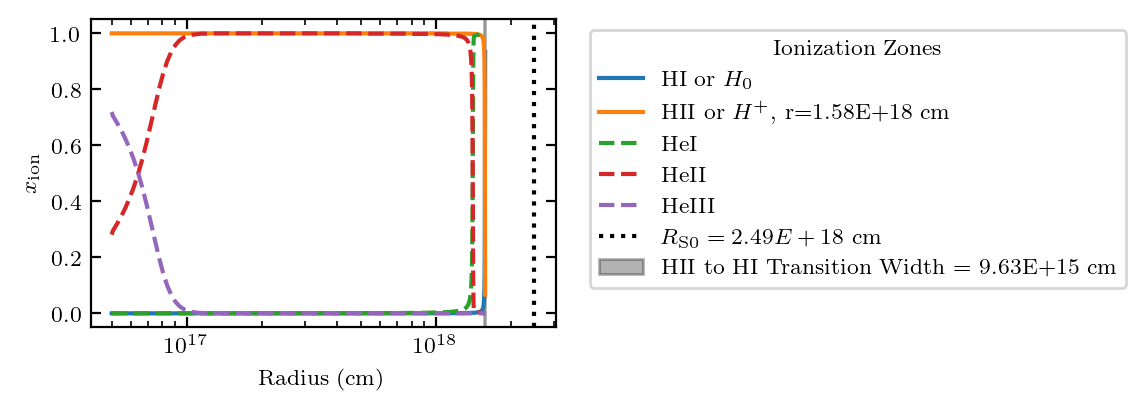

In [432]:
# Plot ionization fractions (for Problem 1, and useful for 2 and 3)
fig, ax = plt.subplots(1, 1, figsize=(3, 2), dpi=200)
ax.plot(r, HI, label="HI or $H_0$")
ax.plot(r, HII, label=r"HII or $H^+$, r={:.2E} cm".format(radius_HII))

ax.plot(r, HeI, ls="--", label="HeI")
ax.plot(r, HeII, ls="--", label="HeII")
ax.plot(r, HeIII, ls="--", label="HeIII")
ax.set(xscale="log", xlabel="Radius (cm)", ylabel=r"$x_{\rm ion}$")
ax.axvline(
    radius_strom,
    color="black",
    ls=":",
    label=r"$R_{{\rm S0}} = {:.2E} $ cm".format(radius_strom),
)
ax.axvspan(
    HII_transition_start,
    HII_transition_end,
    alpha=0.3,
    color="k",
    label="HII to HI  Transition Width = {:.2E} cm".format(transition_width),
)

ax.legend(ncols=1, title="Ionization Zones", loc="upper left", bbox_to_anchor=(1.05, 1))
plt.show()

# Question 2

In [336]:
log_nes = [1, 2, 3, 4, 5]
model_names = ["logne_1", "logne_2", "logne_3", "logne_4", "logne_5"]

for i, density in enumerate(log_nes):
    print(density)
    run_cloudy(dir_="./problem2/", model_name=model_names[i], metals=1)

1
   logne_1: Cloudy ended after seconds: in 93.00032877922058
2
   logne_2: Cloudy ended after seconds: in 95.22209310531616
3
   logne_3: Cloudy ended after seconds: in 117.61542057991028
4
   logne_4: Cloudy ended after seconds: in 154.72487950325012
5
   logne_5: Cloudy ended after seconds: in 119.55003118515015


Plot the ratio of the emissivities vs. log ne for key three-level atom density diagnostic lines from the $2p^3$ ions OII and SII 

Here, we'll plot a figure similar to Figure 18.4, considering the line ratios of $\dfrac{\left[ OII\right] 3729.8}{\left[ OII\right] 3727.1}$ and also  $\dfrac{\left[ SII\right] 6718.3}{\left[ SII\right] 6732.7}$.

In [514]:
log_nes = [1, 2, 3, 4, 5]
model_names = ["logne_1", "logne_2", "logne_3", "logne_4", "logne_5"]

# let's loop over the models with varying densities

nes = []
SII_ratios = []
OII_ratios = []
Te_4 = []

for i, model in enumerate(model_names):
    Mod = pc.CloudyModel(os.path.join("./problem2", model), verbose=True)
    ne = Mod.ne
    te = Mod.te
    SII_ratio = np.array(Mod.get_emis("S__2_671830A")) / np.array(
        Mod.get_emis("S__2_673270A")
    )
    OII_ratio = np.array(Mod.get_emis("O__2_372980A")) / np.array(
        Mod.get_emis("O__2_372710A")
    )
    nes.append(ne)
    SII_ratios.append(SII_ratio)
    OII_ratios.append(OII_ratio)
    Te_4.append(te / 1e4)

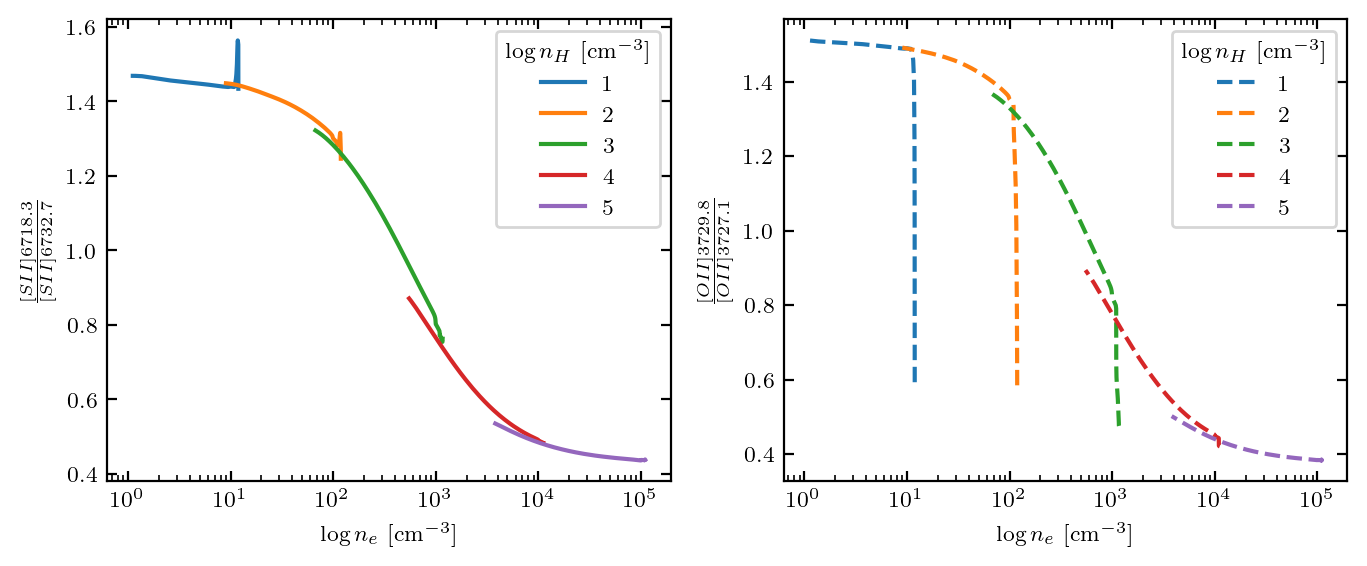

In [603]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3), dpi=200)

for i, n in enumerate(nes):
    ax[0].plot(n, SII_ratios[i], label="{}".format(log_nes[i]))
    ax[1].plot(n, OII_ratios[i], ls="--", label="{}".format(log_nes[i]))

ax[0].set(
    xscale="log",
    xlabel="$\log n_e$ [cm$^{-3}$]",
    ylabel=r"$\frac{\left[ SII\right] 6718.3}{\left[ SII\right] 6732.7}$",
)
ax[0].legend(title="$\log n_H$ [cm$^{-3}$]")

ax[1].set(
    xscale="log",
    xlabel="$\log n_e$ [cm$^{-3}$]",
    ylabel=r"$\frac{\left[ OII\right] 3729.8}{\left[ OII\right] 3727.1}$",
)
ax[1].legend(title="$\log n_H$ [cm$^{-3}$]")
plt.show()

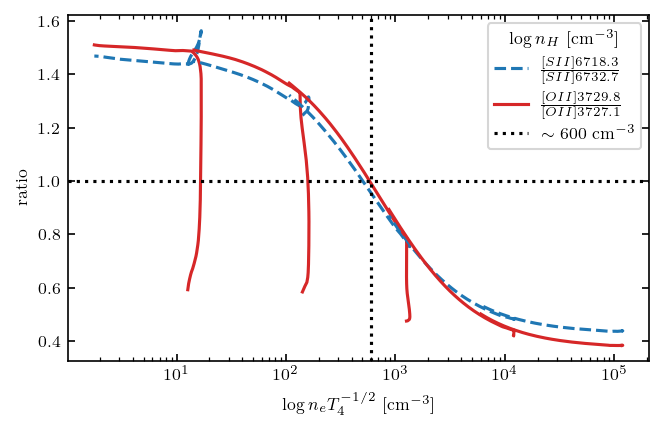

In [516]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3), dpi=150)

for i, n in enumerate(nes):
    ne_t4 = n / Te_4[i] ** 0.5
    if i == 0:
        ax.plot(
            ne_t4,
            SII_ratios[i],
            color="tab:blue",
            ls="--",
            label=r"$\frac{\left[ SII\right] 6718.3}{\left[ SII\right] 6732.7}$",
        )
        ax.plot(
            ne_t4,
            OII_ratios[i],
            color="tab:red",
            label=r"$\frac{\left[ OII\right] 3729.8}{\left[ OII\right] 3727.1}$",
        )
    else:
        ax.plot(ne_t4, SII_ratios[i], color="tab:blue", ls="--")
        ax.plot(ne_t4, OII_ratios[i], color="tab:red")

ax.set(xscale="log", xlabel="$\log n_e T_4^{-1/2}$ [cm$^{-3}$]", ylabel=r"ratio")

ax.axhline(1, ls=":", color="k")
ax.axvline(6e2, ls=":", color="k", label="$\sim 600$ cm$^{-3}$")
ax.legend(title="$\log n_H$ [cm$^{-3}$]")
# ax[1].set(xscale="log", xlabel="$\log n_e$ [cm$^{-3}$]", ylabel=r"$\frac{\left[ OII\right] 3729.8}{\left[ OII\right] 3727.1}$")
# ax[1].legend(title="$\log n_H$ [cm$^{-3}$]")
plt.show()

a. Please see the plots above. Note, I attribute the intermitent drops in density to be just a numerical artifact due to the discontinuities in the HII region.

b. For the high density regime, the ratios for both diagnostic lines fall between 0.4 to 0.6, let's say around 0.5. For the low denisty regime (around 1 - 10 cm^-3) this is ratio is around 1.5. The crossover density, which is when the ratio has a value of around 1, occurs when the density is around 600 cm$^{-3}$. This is fairly consistent with Figure 4 where this crossover density is around 500 cm$^{-3}$ -- close enough. In the low and high density regimes, the ratios are also consistent which are 0.3 - 0.4 in the high density and 1.4-1.5 in the low density. 

According to Table 18.2 the critical densities, on average, are larger than the crossover density. The critical density appears to be the density at which the ratio starts to plateu at the high density regime. In OII's case, this is around 5,000 cm$^{-3}$ which is around a factor of 10 times more dense than the turnover density. ___However__, note thtat this table is at 10^4 K, we are near this regime but not exactly, so it might be slightly off.

c. OII and SII is fairly similar-- they have around the same ratios in the low and high density regimes and their crossover densities are situated at roughly 600 cm$^{-3}$. For this reason, they wouldn't really be telling us different things. So, I don't think I would need both. However, if you want redundancy to double check values, this could be a good way to double check. BUT, if you want to be able to diagnose more density ranges, then I would not use these same lines. 

Their useful range is when the ratio changes value a lot for a given density range-- when the ratio is density sensitive. For example, you wouldn't use this diagnostic for n_h ~ 1 - 10, since it's value stays around 1.5. This diagnostic is particualrly useful around 100 - 10000 cm^{-3}, since the value changes a lot in this density regime. 

# Question 3

In [620]:
metals = [3, 1, 0.1, 0.01, 0.001]
model_names = ["Z_3", "Z_1", "Z_01", "Z_001", "Z_0001"]


# note, we change the density to 10^4 cm^{-4}
for i, Z in enumerate(metals):
    print(Z)
    # canonical from problem 1 with Z changed
    run_cloudy(dir_="./problem3/", model_name=model_names[i], dens=4, metals=Z)

3
   Z_3: Cloudy ended after seconds: in 55.39567184448242
1
   Z_1: Cloudy ended after seconds: in 62.743754625320435
0.1
   Z_01: Cloudy ended after seconds: in 60.760411977767944
0.01
   Z_001: Cloudy ended after seconds: in 70.06914591789246
0.001
   Z_0001: Cloudy ended after seconds: in 51.61224889755249


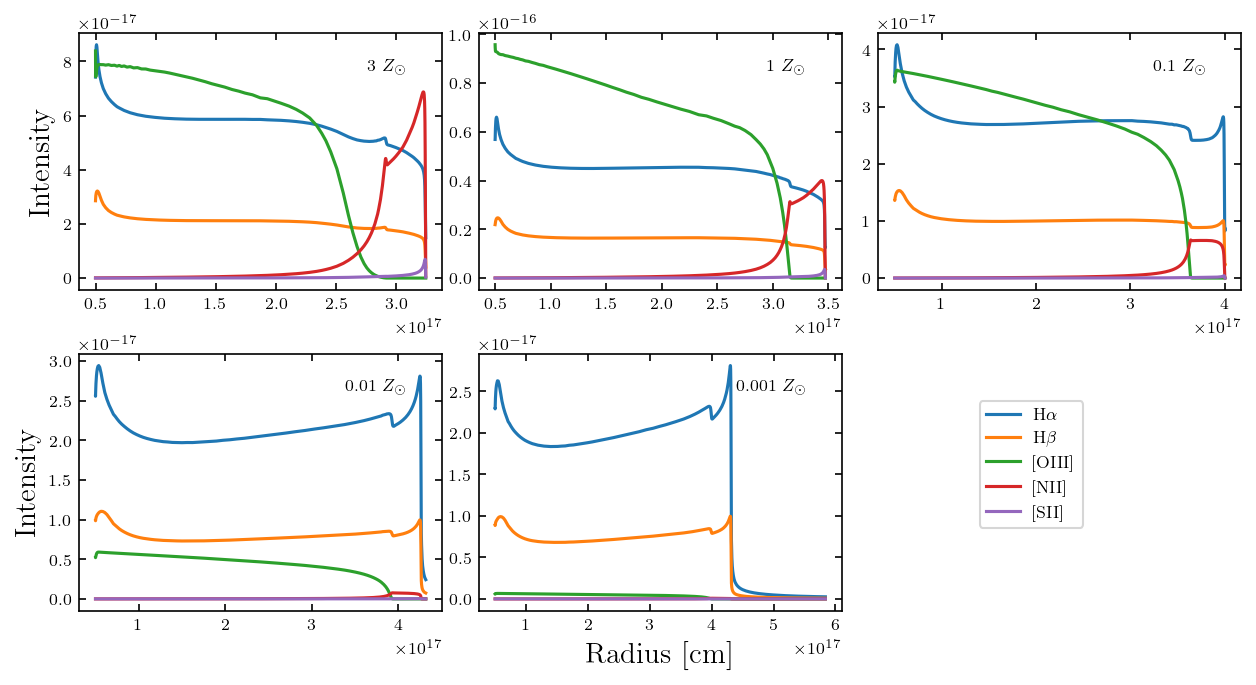

In [642]:
# let's loop over the models with varying metallicities


fig, ax = plt.subplots(2, 3, figsize=(10, 5), dpi=150)
plt.subplots_adjust(wspace=0.1, hspace=0.25)
ax = ax.ravel()

for i, model in enumerate(model_names):
    Mod = pc.CloudyModel(os.path.join("./problem3", model), verbose=False)
    ne = Mod.ne
    te = Mod.te
    NII_ratio = np.array(Mod.get_emis("N__2_575620A")) / np.array(
        Mod.get_emis("N__2_658530A")
    )
    OIII_ratio = np.array(Mod.get_emis("O__3_436440A")) / np.array(
        Mod.get_emis("O__3_500820A")
    )

    ax[i].plot(Mod.radius, Mod.get_emis("H__1_656281A"), label=r"H$\alpha$")
    ax[i].plot(Mod.radius, Mod.get_emis("H__1_486133A"), label=r"H$\beta$")
    ax[i].plot(Mod.radius, Mod.get_emis("O__3_500684A"), label="[OIII]")
    ax[i].plot(Mod.radius, Mod.get_emis("N__2_658345A"), label="[NII]")
    ax[i].plot(Mod.radius, Mod.get_emis("S__2_671644A"), label="[SII]")

    ax[i].text(
        0.90,
        0.9,
        r" {} $ Z_\odot$".format(metals[i]),
        transform=ax[i].transAxes,
        va="top",
        ha="right",
    )


ax[5].axis("off")
ax[4].legend(bbox_to_anchor=(0.8, 0.4), bbox_transform=fig.transFigure)
ax[0].set_ylabel(r"Intensity", fontsize=14)
ax[3].set_ylabel(r"Intensity", fontsize=14)
ax[4].set_xlabel("Radius [cm]", fontsize=14)
plt.show()

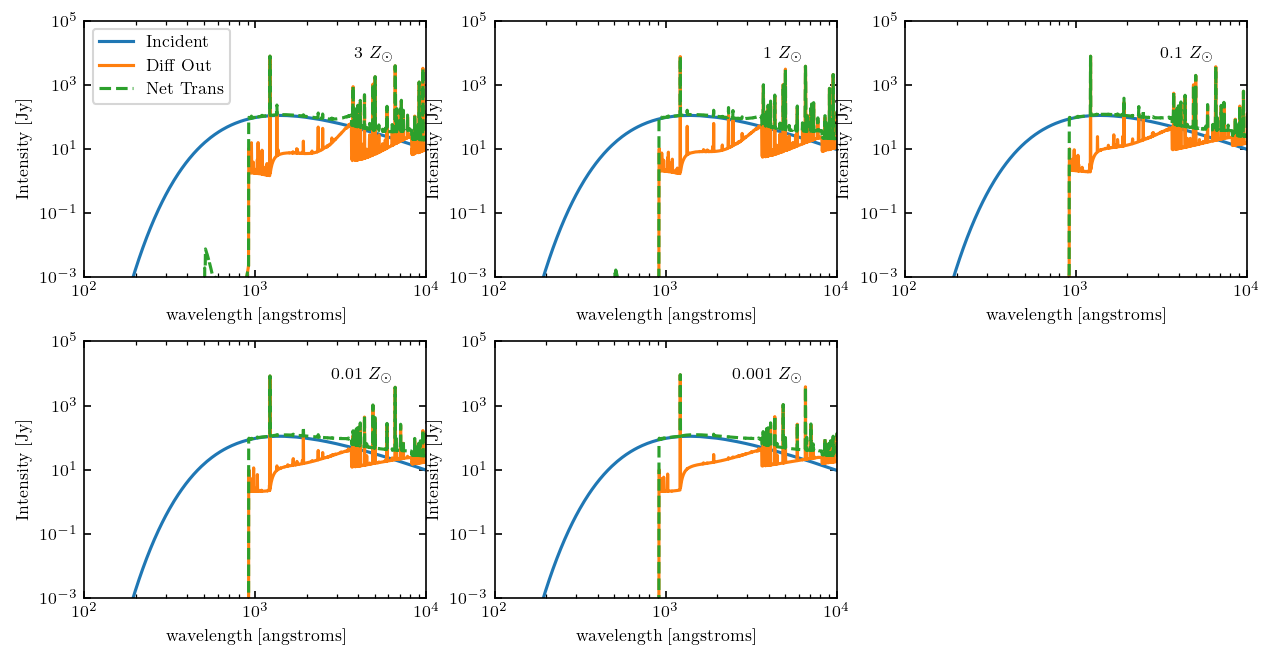

In [643]:
fig, ax = plt.subplots(2, 3, figsize=(10, 5), dpi=150)
plt.subplots_adjust(wspace=0.2, hspace=0.25)
ax = ax.ravel()

for i, model in enumerate(model_names):
    Mod = pc.CloudyModel(os.path.join("./problem3", model), verbose=False)
    ax[i].plot(
        Mod.get_cont_x(unit="Ang"),
        Mod.get_cont_y(cont="incid", unit="Jy"),
        label="Incident",
        
    )
    ax[i].plot(
        Mod.get_cont_x(unit="Ang"),
        Mod.get_cont_y(cont="diffout", unit="Jy"),
        label="Diff Out",
    )
    ax[i].plot(
        Mod.get_cont_x(unit="Ang"),
        Mod.get_cont_y(cont="ntrans", unit="Jy"),
        label="Net Trans",
        ls="--"
    )

    ax[i].text(
        0.90,
        0.9,
        r" {} $ Z_\odot$".format(metals[i]),
        transform=ax[i].transAxes,
        va="top",
        ha="right",
    )
    ax[i].set(
        xscale="log",
        yscale="log",
        xlabel="wavelength [angstroms]",
        ylabel="Intensity [Jy]",
        xlim=(100, 10000),
        ylim=(1e-3, 1e5),
    )


ax[5].axis("off")
ax[0].legend()
plt.show()

a. and b. For 3 solar metallicities, the OIII dominates in this density regime of around 10^5 $cm^{-3}$ in the inner radius. Halpha then atkes over in internsity in the 7 - 7.5 * 10^16 cm regime. Farther away, around 8 * 10^16 cm, we see a slight uptic in the NII feature. As you decrease the metallicities, the more dominant the Halpha  is around the HII region, beginning at 0.1 Zsun, the Halpha dominante over the other lines. Also, the lower the metallicity, the more supressed the diffused features are around 1o^33 to 10^4 angstroms (colored in orange in the plot immediately above). 

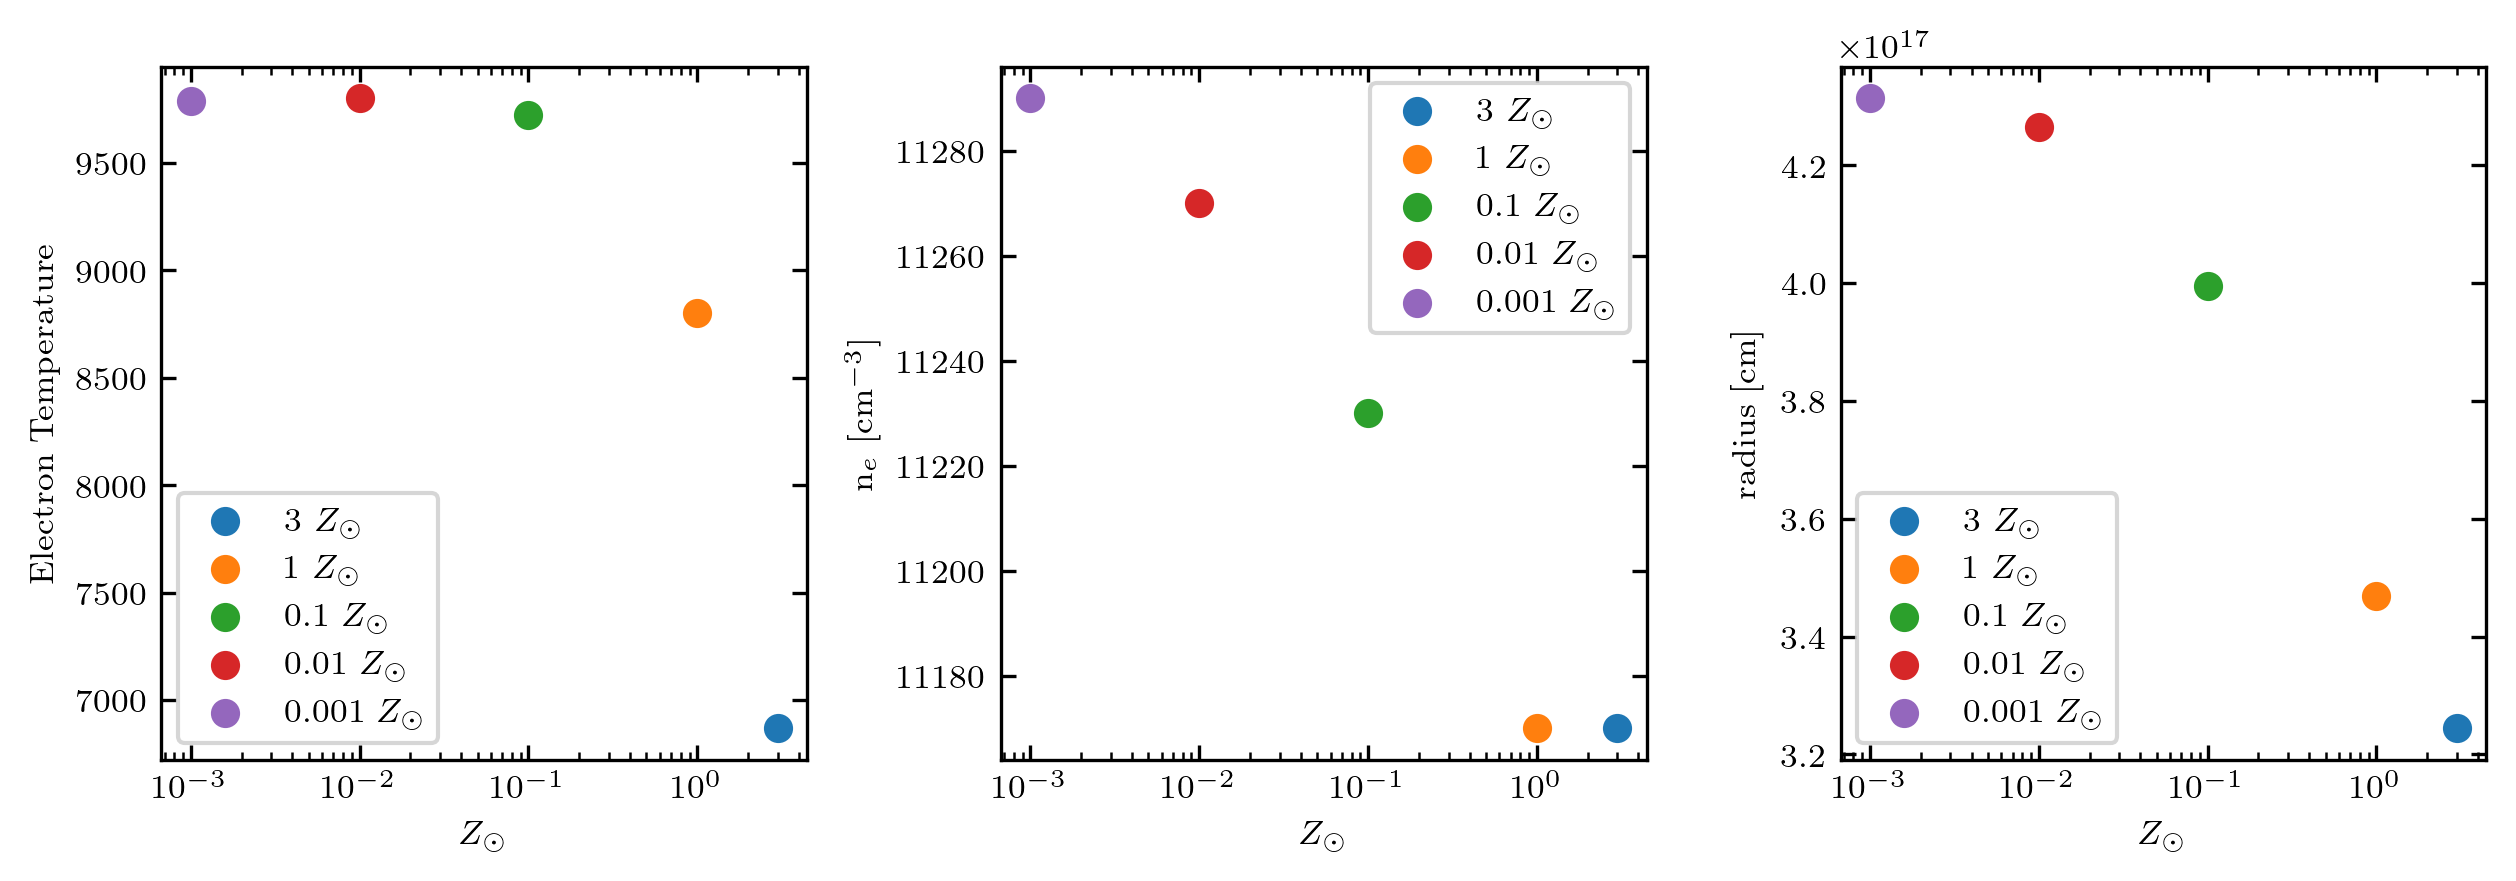

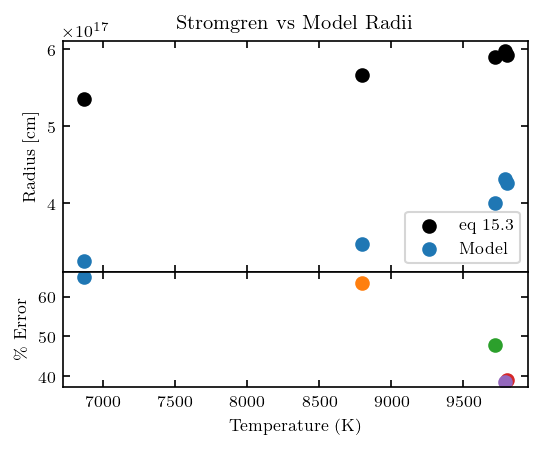

In [661]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3), dpi=300)
plt.subplots_adjust(wspace=0.3, hspace=0.35)
ax = ax.ravel()

for i, model in enumerate(model_names):
    Mod = pc.CloudyModel(os.path.join("./problem3", model), verbose=False)
    ne = Mod.ne
    te = Mod.te
    NII_ratio = np.array(Mod.get_emis("N__2_575620A")) / np.array(
        Mod.get_emis("N__2_658530A")
    )
    OIII_ratio = np.array(Mod.get_emis("O__3_436440A")) / np.array(
        Mod.get_emis("O__3_500820A")
    )
    
    HII = Mod.get_ionic("H", 1)
    radius_idx = np.argmin(np.abs(HII - 0.50))
    HII_radius =  Mod.radius[radius_idx]
    
    ax[0].scatter(metals[i], te[radius_idx], label=r" {} $ Z_\odot$".format(metals[i]))
    ax[0].set(xlabel=r"$ Z_\odot$", ylabel="Electron Temperature")
    ax[0].set(xscale="log")

    ax[1].scatter(metals[i], ne[i], label=r" {} $ Z_\odot$".format(metals[i]))
    ax[1].set(xlabel=r"$ Z_\odot$", ylabel=r"n$_e$ [cm$^{-3}$]")
    ax[1].set(xscale="log")
        
    ax[2].scatter(metals[i], HII_radius, label=r" {} $ Z_\odot$".format(metals[i]))
    ax[2].set(xlabel=r"$ Z_\odot$", ylabel=r"radius [cm]")
    
    ax[2].set(xscale="log", )
    ax[2].legend(loc="lower left")

    ax[0].legend()
    ax[1].legend()
plt.show()

fig, ax = plt.subplots(2, 1, figsize=(4, 3), dpi=150, sharex=True, gridspec_kw={'height_ratios': [2, 1]})
plt.subplots_adjust(hspace=0)
for i, model in enumerate(model_names):
    Mod = pc.CloudyModel(os.path.join("./problem3", model), verbose=False)
    ne = Mod.ne
    te = Mod.te
    
    HII = Mod.get_ionic("H", 1)
    radius_idx = np.argmin(np.abs(HII - 0.50))
    HII_radius =  Mod.radius[radius_idx]

    radius_strom = stromgren_r(10 ** (48.75), ne[radius_idx], te[radius_idx])

    actual_radius = HII_radius

    residual = (radius_strom - actual_radius) /  actual_radius
    
    if i ==0:
        ax[0].scatter(te[radius_idx], radius_strom, color="k", label=r"eq 15.3")
        ax[0].scatter(te[radius_idx], actual_radius,color="tab:blue", label=r"Model")
    else:
        ax[0].scatter(te[radius_idx], radius_strom, color="k")
        ax[0].scatter(te[radius_idx], actual_radius, color="tab:blue")

    ax[1].scatter(te[radius_idx],residual*100)

ax[0].set(xlabel="Temperature (K)", ylabel="Radius [cm]", title="Stromgren vs Model Radii")
ax[1].set(xlabel="Temperature (K)", ylabel="\% Error")
ax[0].legend()
plt.show()

c. Here, we look at the value of T_e and n_e of the model by taking these values at the radius (i.e., when HII reaches an ionization fraction of 0.5).  The electron temperature falls with rising metallicity, which makes sense because there are much more transitions for cooling. The density also falls with increasing metallicity, which suggests that the transitions from the HII to the HI region is more diffuse with metallicity. Finally, the more metallic it is, the smaller the HII region. 

Comparing our Cloudy model outputs to the expected strgomgren radius, it is fairly close, with the % error falling between 40 to 70 percent, which is good given that equation 15.3 does not have any metal dependancies (assuming 1 solar metallicity I think).

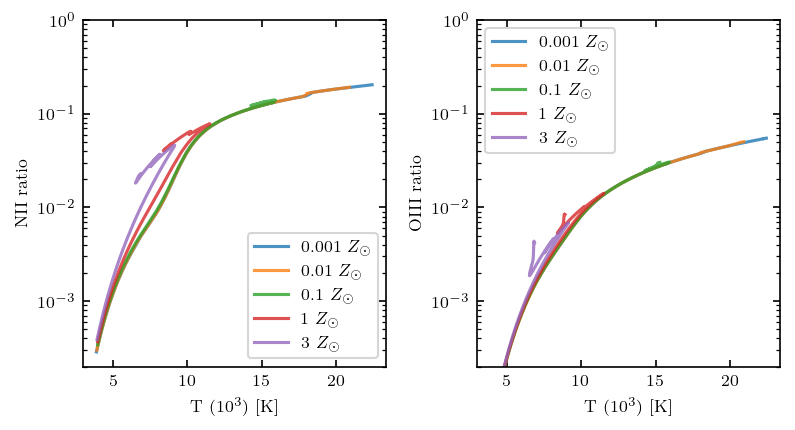

In [558]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3), dpi=150)
plt.subplots_adjust(wspace=0.3, hspace=0)
ax = ax.ravel()

for i, model in enumerate(model_names[::-1]):
    Mod = pc.CloudyModel(os.path.join("./problem3", model), verbose=False)
    ne = Mod.ne
    te = Mod.te
    NII_ratio = np.array(Mod.get_emis("N__2_575620A")) / np.array(
        Mod.get_emis("N__2_658530A")
    )
    OIII_ratio = np.array(Mod.get_emis("O__3_436440A")) / np.array(
        Mod.get_emis("O__3_500820A")
    )

    ax[0].plot(
        te / 1e3,
        NII_ratio,
        ls="-",
        alpha=0.8,
        label=r" {} $ Z_\odot$".format(metals[::-1][i]),
    )
    ax[0].set(
        xlabel=r"T (10$^3$) [K]", yscale="log", ylabel="NII ratio", ylim=(2e-4, 1)
    )

    ax[1].plot(
        te / 1e3,
        OIII_ratio,
        ls="-",
        alpha=0.8,
        label=r" {} $ Z_\odot$".format(metals[::-1][i]),
    )
    ax[1].set(
        xlabel=r"T (10$^3$) [K]", yscale="log", ylabel=r"OIII ratio", ylim=(2e-4, 1)
    )

    ax[0].legend()
    ax[1].legend()

plt.show()

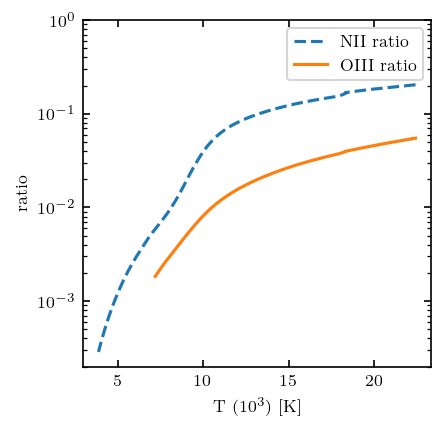

In [557]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=150)

for i, model in enumerate(model_names[::-1]):
    Mod = pc.CloudyModel(os.path.join("./problem3", model), verbose=False)
    ne = Mod.ne
    te = Mod.te
    NII_ratio = np.array(Mod.get_emis("N__2_575620A")) / np.array(
        Mod.get_emis("N__2_658530A")
    )
    OIII_ratio = np.array(Mod.get_emis("O__3_436440A")) / np.array(
        Mod.get_emis("O__3_500820A")
    )
    if i == 0:
        ax.plot(te / 1e3, NII_ratio, ls="--", label=r"NII ratio")
        ax.set(xlabel=r"T (10$^3$) [K]", yscale="log", ylabel="ratio", ylim=(2e-4, 1))

        ax.plot(te / 1e3, OIII_ratio, label=r"OIII ratio")
        ax.set(xlabel=r"T (10$^3$) [K]", yscale="log", ylim=(2e-4, 1))

    ax.legend()


plt.show()

d. Temperature vs line ratios are shown in the plot above. Note, we are at a similar situation where the features of the shape are similar, with a different offset. Note, that different metallicities cover different parts of the temperature space. So it is somewhat sensitive to metallicity. For example, if we were to see line ratio of NII between  1e-2 to 2e-2, we can establish an upper bound of 1 Z_sun. Note there are some degeneracies between the metallicities-- i.e., some metallicites can overlap in terms of the line ratio for a given temperature. But lowering the metallicity, overall allows for higher temperatures. 

e. The existence of metals aids with cooling since they are heavier with hydrogen and makes more available atomic and molecular transitions (more orbitals) allowing the gas to lose its internal energy more quickly. So, it is harder -- less common -- for a solar metallicity gas to be raised to such a high temp. So it is indeed an upper bound. 

# Question 4

In [533]:
run_cloudy(dir_="./problem4/", model_name="seyfert", config="seyfert")


   seyfert: Cloudy ended after seconds: in 75.90483856201172


In [678]:
run_cloudy(dir_="./problem4/", model_name="LINER", Teff=5e4)

   LINER: Cloudy ended after seconds: in 73.8380377292633


In [689]:
run_cloudy(dir_="./problem4/", model_name="SF", Teff=3e4)

   SF: Cloudy ended after seconds: in 66.60520243644714


In [690]:
canon_HII_mod = pc.CloudyModel(os.path.join("./o7v", "hw1_v1"), verbose=False)

NII_over_Halpha = canon_HII_mod.get_emis("N__2_658345A") / canon_HII_mod.get_emis(
    "H__1_656281A"
)
HIII_over_Hbeta = canon_HII_mod.get_emis("O__3_500684A") / canon_HII_mod.get_emis(
    "H__1_486133A"
)

seyfert_mod = pc.CloudyModel(os.path.join("./problem4", "seyfert"), verbose=False)
NII_over_Halpha_seyfert = seyfert_mod.get_emis("N__2_658345A") / seyfert_mod.get_emis(
    "H__1_656281A"
)
HIII_over_Hbeta_seyfert = seyfert_mod.get_emis("O__3_500684A") / seyfert_mod.get_emis(
    "H__1_486133A"
)

liners_mod = pc.CloudyModel(os.path.join("./problem4", "LINER"), verbose=False)
NII_over_Halpha_liners = liners_mod.get_emis("N__2_658345A") / liners_mod.get_emis(
    "H__1_656281A"
)
HIII_over_Hbeta_liners = liners_mod.get_emis("O__3_500684A") / liners_mod.get_emis(
    "H__1_486133A"
)

SF_mod = pc.CloudyModel(os.path.join("./problem4", "SF"), verbose=False)
NII_over_Halpha_SF = SF_mod.get_emis("N__2_658345A") / SF_mod.get_emis(
    "H__1_656281A"
)
HIII_over_Hbeta_SF = SF_mod.get_emis("O__3_500684A") / SF_mod.get_emis(
    "H__1_486133A"
)

def OIII_over_H_eq_18p4(NII_over_Hb):
    return 1.10 - ( 0.60 / (0.01 - np.log10(NII_over_Hb)))
    
NII_over_Halpha_18p4 = np.geomspace (0.01, 1, 100)
OIII_over_H_18p4 = OIII_over_H_eq_18p4(NII_over_Halpha_18p4)

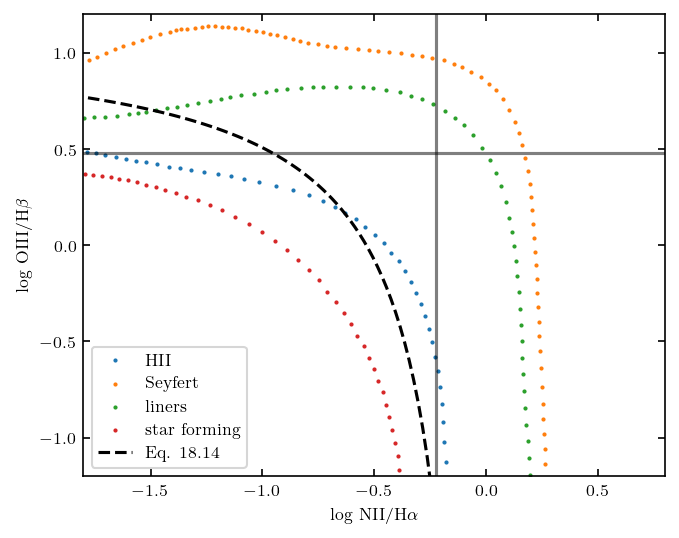

In [692]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=150)
ax.axvline(np.log10(0.6), alpha=0.5, color="k")
ax.axhline(np.log10(3), alpha=0.5, color="k")
ax.scatter(np.log10(NII_over_Halpha), np.log10(HIII_over_Hbeta), s=1, label="HII")
ax.scatter(
    np.log10(NII_over_Halpha_seyfert),
    np.log10(HIII_over_Hbeta_seyfert),
    s=1,
    label="Seyfert",
)

ax.scatter(
    np.log10(NII_over_Halpha_liners),
    np.log10(HIII_over_Hbeta_liners),
    s=1,
    label="liners",
)

ax.scatter(
    np.log10(NII_over_Halpha_SF),
    np.log10(HIII_over_Hbeta_SF),
    s=1,
    label="star forming",
)

ax.plot(np.log10(NII_over_Halpha_18p4), OIII_over_H_18p4, label="Eq. 18.14", ls = "--", color="k")

ax.set(xlabel=r"log NII/H$\alpha$", ylabel=r"log OIII/H$\beta$")
ax.set_xlim((-1.8, 0.8))
ax.set_ylim((-1.2, 1.2))
ax.legend()
plt.show()

a. Star-forming galaxies are quite similar to HII regions in a sense that their ratios are close to or falls within the dashed black curve (eq. 18.14). 

b. Discussed this with Justin, Lori, Alex, and Sally. Note, I generated the SF and liners by simply modifying the effective temperature of the region.

c. Please see above. 

Note, in the book, the star forming galaxy resembels the HII region. For this reason, the SF galaxy modelled was chosen to be withint the dashed black curve.
